## Mean Squared Error (MSE)

In [4]:
from __future__ import annotations

import os

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

from warnings import filterwarnings
filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [5]:
# Generate regression dataset :
X, y = make_regression(n_samples = 1000, n_features = 20, noise = .1, random_state = 1)

# Standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y), 1))[:, 0]

# Split into train and test 
n_train = 500
trainInput, testInput = X[:n_train, :], X[n_train:, :]
trainTarget, testTarget = y[:n_train], y[n_train:]

In [6]:
# Define model 
opt = SGD(learning_rate = .01, momentum = .9)
loss = "mean_squared_error"
metrics = ["accuracy"]

model = Sequential([
                    Dense(25, input_dim = 20, activation = "relu", 
                          kernel_initializer = "he_uniform"),
                    Dense(1,activation = "linear")
                    ])
                    
model.compile(loss = loss, optimizer = opt, metrics = metrics)

In [7]:
history = model.fit(trainInput, trainTarget, 
                    validation_data = (testInput, testTarget), 
                    epochs = 100, verbose = 0)

In [8]:
train_mse = model.evaluate(trainInput, trainTarget, verbose = 0)
test_mse = model.evaluate(testInput, testTarget, verbose = 0)

print(f"Train mse: {train_mse} | Test mse: {test_mse}")

Train mse: [0.0025588974822312593, 0.0] | Test mse: [0.007275257259607315, 0.0]


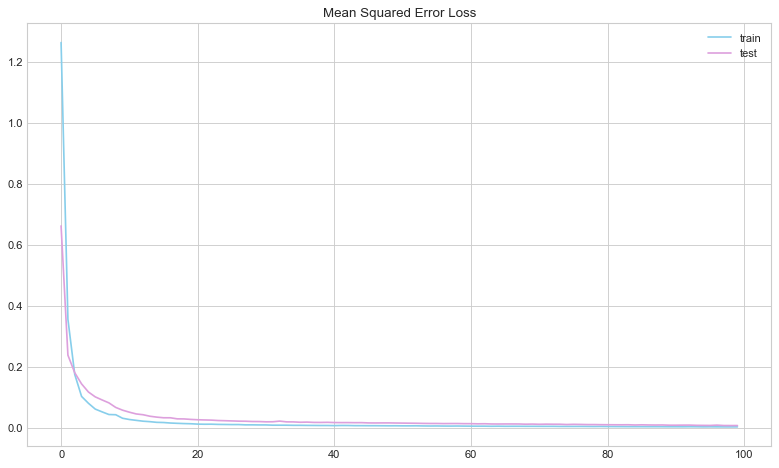

In [9]:
plt.figure(figsize = (12, 7), dpi = 80)
plt.title('Mean Squared Error Loss')
plt.plot(history.history['loss'], label='train', color = "skyblue")
plt.plot(history.history['val_loss'], label='test', color = "plum")
plt.legend()
plt.show()